## Intro

You will think about and calculate permutation importance with a sample of data from the [Taxi Fare Prediction](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction) competition.

We won't focus on data exploration or model building for now. You can just run the cell below to 
- Load the data
- Divide the data into training and validation
- Build a model that predicts taxi fares
- Print a few rows for you to review

In [3]:
# Loading data, dividing, modeling and EDA below
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Plotting library
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('train.csv', nrows=50000)

# Remove data with extreme outlier coordinates or negative fares
data = data.query('pickup_latitude > 40.7 and pickup_latitude < 40.8 and ' +
                  'dropoff_latitude > 40.7 and dropoff_latitude < 40.8 and ' +
                  'pickup_longitude > -74 and pickup_longitude < -73.9 and ' +
                  'dropoff_longitude > -74 and dropoff_longitude < -73.9 and ' +
                  'fare_amount > 0'
                  )

y = data.fare_amount

base_features = ['pickup_longitude',
                 'pickup_latitude',
                 'dropoff_longitude',
                 'dropoff_latitude',
                 'passenger_count']

X = data[base_features]


train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
first_model = RandomForestRegressor(n_estimators=50, random_state=1).fit(train_X, train_y)

# Environment Set-Up for feedback system.
from learntools.core import binder
binder.bind(globals())
from learntools.ml_explainability.ex2 import *
print("Setup Complete")

# show data
print("Data sample:")
data.head()

ModuleNotFoundError: No module named 'learntools'

The following two cells may also be useful to understand the values in the training data:

In [ ]:
train_X.describe()

In [ ]:
train_y.describe()

## Question 1

The first model uses the following features
- pickup_longitude
- pickup_latitude
- dropoff_longitude
- dropoff_latitude
- passenger_count

Before running any code... which variables seem potentially useful for predicting taxi fares? Do you think permutation importance will necessarily identify these features as important?

Once you've thought about it, run `q_1.solution()` below to see how you might think about this before running the code.

In [ ]:
# Check your answer (Run this code cell to receive credit!)
q_1.solution()

## Question 2

Create a `PermutationImportance` object called `perm` to show the importances from `first_model`.  Fit it with the appropriate data and show the weights.

For your convenience, the code from the tutorial has been copied into a comment in this code cell.

In [5]:
pip install eli5

     |████████████████████████████████| 216 kB 11.1 MB/s eta 0:00:01
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
     |████████████████████████████████| 47 kB 28.6 MB/s eta 0:00:01
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=9225b9e38b35f0bbee75ccdae553c997503e96046e6116578f137e57944fddcc
  Stored in directory: /Users/graceteong/Library/Caches/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
Note: you may need to restart the kernel to use updated packages.


Weight,Feature
0.8426 ± 0.0168,dropoff_latitude
0.8269 ± 0.0211,pickup_latitude
0.5943 ± 0.0436,pickup_longitude
0.5387 ± 0.0273,dropoff_longitude
-0.0020 ± 0.0013,passenger_count


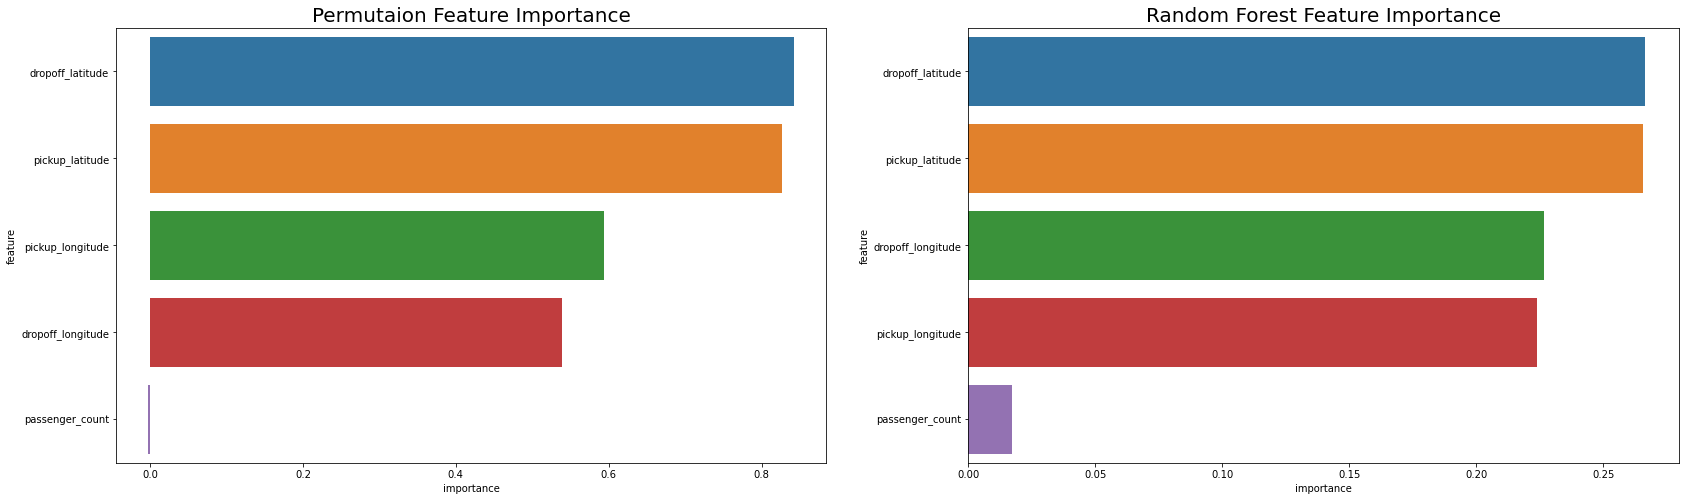

In [6]:
import eli5
from eli5.sklearn import PermutationImportance

# Make a small change to the code below to use in this problem. 
perm = PermutationImportance(first_model, random_state=1).fit(val_X, val_y)

# Check your answer
# q_2.check()


# Store Permutaion feature importance details in the dataframe for further analysis
perm_df = pd.DataFrame()
perm_df["feature"] = base_features
perm_df["importance"] = perm.feature_importances_

# Store Randomforest feature importance details in the dataframe for further analysis
rf_feature_importance_df = pd.DataFrame()
rf_feature_importance_df["feature"] = base_features
rf_feature_importance_df["importance"] = first_model.feature_importances_

# plot PFI chart
fig, axes = plt.subplots(1, 2, figsize=(28,8))
plt.rcParams.update({'font.size': 12})
#Permutation Feature Importance
perm_feature_importance_df  = perm_df.sort_values('importance', ascending=False).reset_index()
sns.barplot(x ='importance', y ='feature', data= perm_feature_importance_df[:20], ax=axes[0])
axes[0].set_title("Permutaion Feature Importance", fontsize=20)

#Random Forest Default Feature Importance
#When using a tree-ensemble like random forest you can find out which features the model found valuable by checking the feature importances. 
#In scikit-learn the feature importances are a reflection of how well a feature reduces some criterion like mean squared error for regression problem or gini / entropy for classification problem. 
#This method for calculating feature importance is typically called mean decrease impurity.
feature_importance_df  = rf_feature_importance_df.sort_values('importance', ascending=False).reset_index()
sns.barplot(x ='importance', y ='feature', data= feature_importance_df[:20], ax=axes[1])
axes[1].set_title("Random Forest Feature Importance", fontsize=20)

# uncomment the following line to visualize your results
eli5.show_weights(perm, feature_names = val_X.columns.tolist())


In [26]:
??PermutationImportance

Uncomment the lines below for a hint or to see the solution.

In [8]:
q_2.hint()
q_2.solution()

NameError: name 'q_2' is not defined

## Question 3
Before seeing these results, we might have expected each of the 4 directional features to be equally important.

But, on average, the latitude features matter more than the longititude features. Can you come up with any hypotheses for this?

After you've thought about it, check here for some possible explanations:

In [7]:
# Check your answer (Run this code cell to receive credit!)
q_3.solution()

## Question 4

Without detailed knowledge of New York City, it's difficult to rule out most hypotheses about why latitude features matter more than longitude.

A good next step is to disentangle the effect of being in certain parts of the city from the effect of total distance traveled.  

The code below creates new features for longitudinal and latitudinal distance. It then builds a model that adds these new features to those you already had.

Fill in two lines of code to calculate and show the importance weights with this new set of features. As usual, you can uncomment lines below to check your code, see a hint or get the solution.

In [8]:
# create new features
data['abs_lon_change'] = abs(data.dropoff_longitude - data.pickup_longitude)
data['abs_lat_change'] = abs(data.dropoff_latitude - data.pickup_latitude)

features_2  = ['pickup_longitude',
               'pickup_latitude',
               'dropoff_longitude',
               'dropoff_latitude',
               'abs_lat_change',
               'abs_lon_change']

X = data[features_2]
new_train_X, new_val_X, new_train_y, new_val_y = train_test_split(X, y, random_state=1)
second_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(new_train_X, new_train_y)

# Create a PermutationImportance object on second_model and fit it to new_val_X and new_val_y
# Use a random_state of 1 for reproducible results that match the expected solution.
perm2 = ____

# show the weights for the permutation importance you just calculated
____

# Check your answer
q_4.check()

How would you interpret these importance scores? Distance traveled seems far more important than any location effects. 

But the location still affects model predictions, and dropoff location now matters slightly more than pickup location. Do you have any hypotheses for why this might be? The techniques in the next lessons will help you` dive into this more.

In [9]:
# Check your answer (Run this code cell to receive credit!)
q_4.solution()

## Question 5

A colleague observes that the values for `abs_lon_change` and `abs_lat_change` are pretty small (all values are between -0.1 and 0.1), whereas other variables have larger values.  Do you think this could explain why those coordinates had larger permutation importance values in this case?  

Consider an alternative where you created and used a feature that was 100X as large for these features, and used that larger feature for training and importance calculations. Would this change the outputted permutaiton importance values?

Why or why not?

After you have thought about your answer, either try this experiment or look up the answer in the cell below.

In [10]:
# Check your answer (Run this code cell to receive credit!)
q_5.solution()

## Question 6

You've seen that the feature importance for latitudinal distance is greater than the importance of longitudinal distance. From this, can we conclude whether travelling a fixed latitudinal distance tends to be more expensive than traveling the same longitudinal distance?

Why or why not? Check your answer below.

In [11]:
# Check your answer (Run this code cell to receive credit!)
q_6.solution()

## Keep Going

Permutation importance is useful useful for debugging, understanding your model, and communicating a high-level overview from your model.  

Next, learn about **[partial dependence plots](https://www.kaggle.com/dansbecker/partial-plots)** to see **how** each feature affects predictions.


---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/machine-learning-explainability/discussion) to chat with other learners.*